In [5]:
#import necessary stuff
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from sklearn.metrics import classification_report
import numpy as np



3


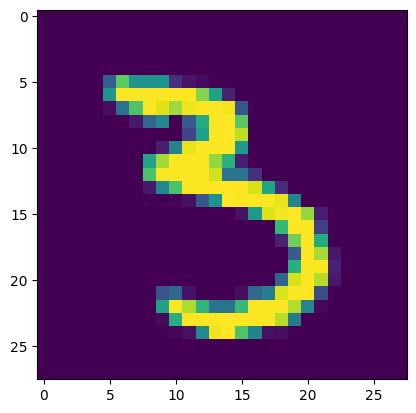

In [6]:
#load dataset

((x_Train,y_Train),(x_test,y_test))=tf.keras.datasets.mnist.load_data()


#reshape dataset
image_index=7666
print(y_Train[image_index])
plt.imshow(x_Train[image_index])







In [7]:
x_Train=x_Train.reshape(x_Train.shape[0],28,28,1)
x_Test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
x_Train=x_Train.astype("float32")
x_test=x_test.astype("float32")

x_Train/=255
x_test/=255

print("shape of X_train:",x_Train.shape)
print("number of images in X_Train:",x_Train.shape[0])







shape of X_train: (60000, 28, 28, 1)
number of images in X_Train: 60000


In [21]:
import pandas as pd
from tensorflow.keras.utils import to_categorical



train_df = pd.read_csv('C://Users//Chinmayee//Desktop//DL//LP-IV-datasets//LP-IV-datasets//MNIST//mnist_train.csv')  # Update 'your_dataset.csv' with your actual file name
test_df = pd.read_csv('C://Users//Chinmayee//Desktop//DL//LP-IV-datasets//LP-IV-datasets//MNIST//mnist_test.csv')
# Step 2: Extract pixel values and labels
trainX = train_df.drop('label', axis=1).values
trainy =train_df['label'].values


testX = test_df.drop('label', axis=1).values
testy =test_df['label'].values
print(testy)


newtrainX=trainX.reshape((-1,28,28,1)).astype('float32')/255.0
newtestX=testX.reshape((-1,28,28,1)).astype('float32')/255.0



trainy = to_categorical(trainy, num_classes=10)
testy = to_categorical(testy, num_classes=10)  # Assuming labels are in the range 1-10

[7 2 1 ... 4 5 6]


In [22]:
#build model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


#compile model





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [25]:
#fit model
batch_size=128
epochs=1
history=model.fit(x=newtrainX,y=trainy,batch_size=batch_size,epochs=epochs)




469/469 [==============================] - 16s 35ms/step - loss: 0.1271 - accuracy: 0.9621


In [26]:
#evaluate model loss acc

print("evaluating network.....")
predictions=model.predict(x_test,batch_size=128)
print(predictions.shape)
print(y_test.shape)



evaluating network.....
79/79 [==============================] - 1s 13ms/step
(10000, 10)
(10000,)


In [27]:
print(classification_report(y_test,predictions.argmax(axis=1)))




              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
# print(history.history.keys())
# #plot model

# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0,5),history.history["loss"],label="loss")
# plt.plot(np.arange(0,5),history.history["accuracy"],label="accruacy")
# plt.xlabel("epochs")
# plt.ylabel("loss/accuracy")
# plt.title("evaluation")
# plt.legend()






1/1 [==============================] - 0s 116ms/step
[7]


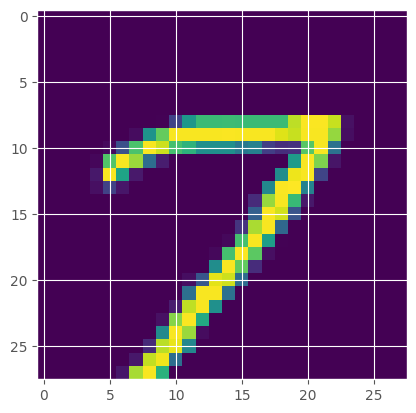

In [30]:
#predict actual data
image_index=6666
plt.imshow(x_test[image_index])
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax(axis=1))

In [60]:
from PIL import Image


trainX.reshape((-1,28,28,1))
trainX.shape

image_data = testX[90, :]

image_data.shape



newimgdata=image_data.reshape((28,28))
newerimage_data = newimgdata.astype(np.uint8)

image = Image.fromarray(newerimage_data)

# # Display the image
image.show()

A=np.array([1,2,3,4,5,6,7,8,9])
A.shape
B=A.reshape(3,3)
print(B)
B.shape

pred=model.predict(testX[90].reshape(1,28,28,1))
print(pred.argmax(axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1/1 [==============================] - 0s 63ms/step
[3]
